# 0 - Introduction

In this EDA, I use the overall dataset to explore general trends across companies, industries, and positions.
The data has already been cleaned through the pipeline, and I have selected only the most relevant features from the raw data.

For example, columns such as got_summary, got_ner, and is_being_worked are not very important for future analysis (see the raw data overview below).

As a result, I only keep the following columns: title, title_lc, company, location, desc, work_type, seniority, and posted_at, skills.

The skills column will be analyzed later in 02_insights.ipynb.

# 1 - Import & paths

In [10]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

ROOT = Path("..")
DATA = ROOT / "data"
RAW = DATA / "raw" / "linkedin_job_postings.parquet"
BRONZE = DATA / "bronze" / "jobs.parquet"

pd.set_option("display.max_colwidth", None)

# 2 - Overview all datas and check null value

In [3]:
raw = pd.read_parquet(RAW)
raw.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-executive-dispensing-norcal-northern-nevada-becton-dickinson-at-bd-3802078767,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Northern Nevada) - Becton Dickinson,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-nurse-rn-care-manager-at-trinity-health-mi-3803386312,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-supervisor-the-forklift-at-wasatch-adaptive-sports-3771464419,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent-real-estate-agent-at-howard-hanna-rand-realty-3797661348,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-supervisor-systems-support-manager-tss-at-irs-office-of-chief-counsel-3803057508,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager TSS),"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [5]:
bronze = pd.read_parquet(BRONZE)
bronze.head()

,title,title_lc,company,location,desc,work_type,seniority,posted_at,skills_list
0,"Global Sourcing Manager, Global Procurement Organization (GPO)","global sourcing manager, global procurement organization (gpo)",Amazon,"Houston, TX",None,Onsite,Mid senior,2024-01-16,[]
1,Food Service Manager,food service manager,Aramark,"Lima, OH",None,Onsite,Mid senior,2024-01-16,[]
2,"Gastroenterologist, Advanced Endoscopist - Kailua, Hawaii","gastroenterologist, advanced endoscopist - kailua, hawaii",Health eCareers,"Kailua, HI",None,Onsite,Mid senior,2024-01-16,[]
3,* Senior Assistant Manager,* senior assistant manager,Kirkland's,"Canton, GA",None,Onsite,Mid senior,2024-01-16,[]
4,Technical Training Instructor,technical training instructor,Morrison Energy Services,"Annesley, England, United Kingdom",None,Onsite,Mid senior,2024-01-16,[]


In [9]:
raw_null_sum = raw.isnull().sum()
bronze_null_sum = bronze.isnull().sum()

print(f"Raw Null: {raw_null_sum}")
print("-------------------------------")
print(f"Bronze Null: {bronze_null_sum}")

Raw Null: job_link               0
last_processed_time    0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           0
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
dtype: int64
-------------------------------
Bronze Null: title                0
title_lc             0
company              0
location             0
desc           1348454
work_type            0
seniority            0
posted_at            0
skills_list          0
dtype: int64


# 3 - Top 10 Hiring Companies and Job Locations (All Roles)

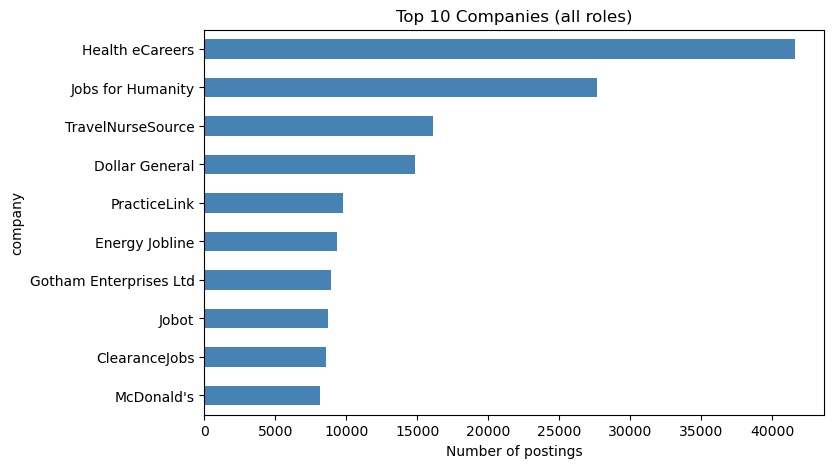

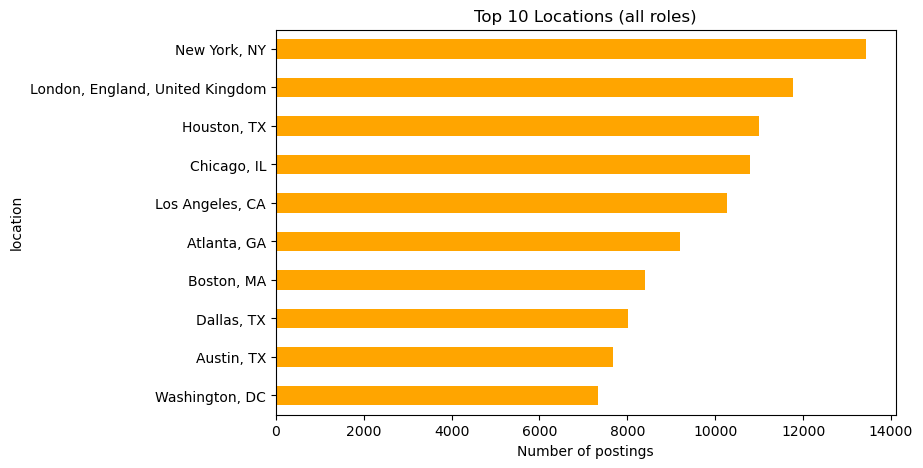

In [15]:
# Select top 10 hiring companies
top_companies = bronze["company"].value_counts().head(10)
plt.figure(figsize=(8, 5))
top_companies.plot(kind="barh", color="steelblue")
plt.gca().invert_yaxis()
plt.title("Top 10 Companies (all roles)")
plt.xlabel("Number of postings")
plt.show()

# Select top 10 locations
top_locations = bronze["location"].value_counts().head(10)
plt.figure(figsize=(8, 5))
top_locations.plot(kind="barh", color="orange")
plt.gca().invert_yaxis()
plt.title("Top 10 Locations (all roles)")
plt.xlabel("Number of postings")
plt.show()

# 4 - Top 10 Job Titles in Overall Market (Proportion)

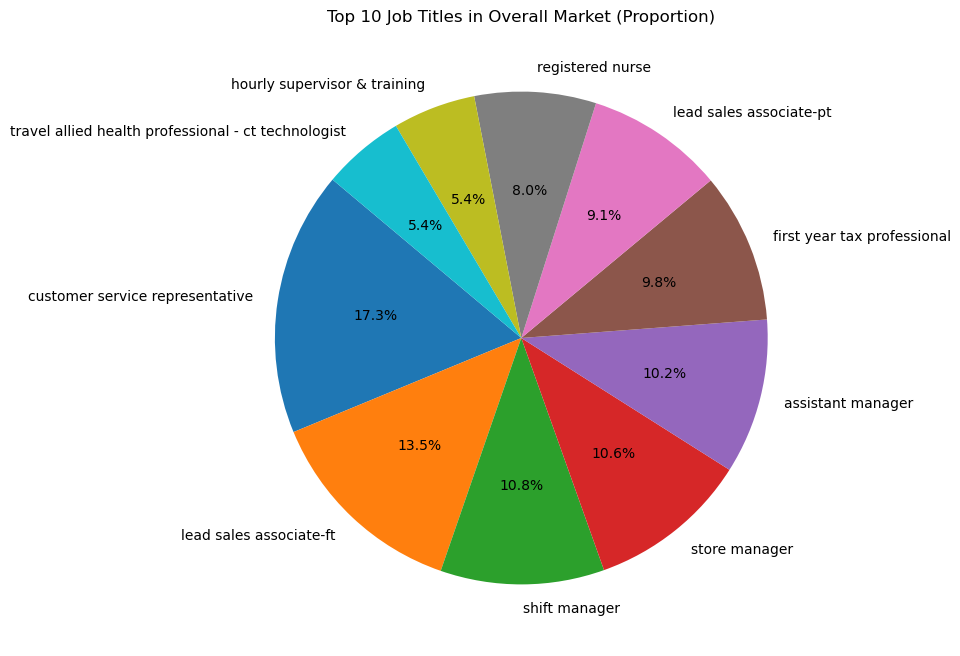

In [ ]:
# 1. Count titles
role_counts = bronze["title_lc"].value_counts().head(10)

# 2. Calculate propotion
role_percent = role_counts / role_counts.sum() * 100

# 3. Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(role_percent, labels=role_percent.index, autopct="%.1f%%", startangle=140)
plt.title("Top 10 Job Titles in Overall Market (Proportion)")
plt.show()

# 5 - Job Distribution by Work Type

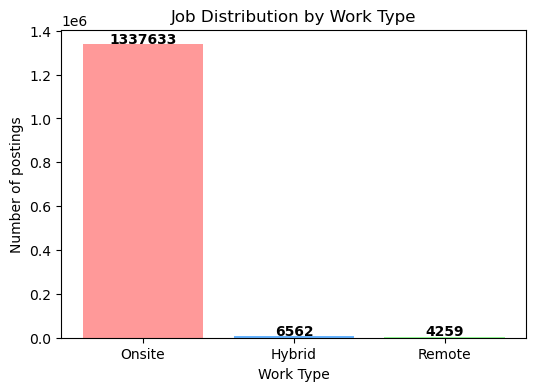

In [ ]:
# Count work type
worktype_counts = bronze["work_type"].value_counts()

# Bar Chart
plt.figure(figsize=(6, 4))
plt.bar(
    worktype_counts.index,
    worktype_counts.values,
    color=["#ff9999", "#66b3ff", "#99ff99"],
)
plt.title("Job Distribution by Work Type")
plt.xlabel("Work Type")
plt.ylabel("Number of postings")

# Draw numbers
for i, v in enumerate(worktype_counts.values):
    plt.text(i, v + 5000, str(v), ha="center", fontweight="bold")

plt.show()